In [85]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations

## Data Collection

In [86]:
# Load the dataset into a pandas DataFrame
df = pd.read_excel('../../Data\Processed_File\INX_Employee_Performance_Cleaned.xlsx')
df  # Display the DataFrame

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\satya\AppData\Local\Temp\ipykernel_11080\3764985256.py:2: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_excel('../../Data\Processed_File\INX_Employee_Performance_Cleaned.xlsx')


,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,-0.541458,1,2,2,5,13,2,0.102061,3,4,...,4,-0.148321,-0.622235,2,0.868276,0.834290,0,1.199546,0,3
1,1.109888,1,2,2,5,13,2,0.591464,4,4,...,4,1.202479,-0.622235,3,0.200371,0.834290,1,0.900149,0,3
2,0.339260,1,1,1,5,13,1,-0.509693,4,4,...,3,1.202479,-0.622235,3,2.649355,2.602323,1,2.397136,0,4
3,0.449349,1,0,0,3,8,2,0.102061,4,2,...,2,1.607719,-0.622235,2,-0.244898,0.539618,1,0.600752,0,3
4,2.541054,1,2,2,5,13,2,0.836165,4,1,...,4,-0.148321,-1.414051,3,-0.912803,-0.639070,2,-0.596837,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.091906,0,3,0,5,13,1,-0.754394,1,4,...,2,-0.688641,0.169581,3,-0.022263,0.244946,0,0.001957,0,4
1196,0.008991,1,1,2,1,15,2,0.102061,2,4,...,1,-0.958801,-0.622235,3,-1.135438,-1.228414,0,-1.195632,0,3
1197,1.440157,1,3,1,1,15,2,2.304373,1,4,...,3,1.202479,0.169581,3,3.094625,1.128962,3,1.199546,0,3
1198,-0.321278,0,3,2,0,1,2,-0.020290,3,4,...,2,-0.283401,0.169581,4,0.423006,0.834290,7,0.900149,0,3


## Now Splitting Data

In [87]:
# Splitting the data into features (X) and target (y)
X = df.drop(columns=["PerformanceRating"])  # Features: All columns except PerformanceRating
y = df["PerformanceRating"]  # Target: The PerformanceRating column

In [88]:
# Check the distribution of the target variable PerformanceRating .
y.value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64


**SMOTE:** SMOTE, or Synthetic Minority Oversampling Technique, is a popular method for addressing imbalanced datasets. It works by generating new synthetic samples of the minority class to balance the class distribution. SMOTE achieves this by creating new data points that lie between existing minority class samples

In [89]:
# Handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
from collections import Counter  # For counting the occurrences of each class in the target variable
from imblearn.over_sampling import SMOTE  # Importing the SMOTE class for over-sampling
smt = SMOTE()  # Creating an instance of the SMOTE class
print("unbalanced data   :  ", Counter(y))  # Displaying the class distribution before SMOTE
X_smote, y_smote = smt.fit_resample(X, y)  # Applying SMOTE to balance the dataset
print("balanced data:    :", Counter(y_smote))  # Displaying the class distribution after SMOTE

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


In [90]:
from sklearn.model_selection import train_test_split # Importing the function to split the data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=10)
# Splitting the data into training and testing sets
# X_smote, y_smote: The features and target data (balanced using SMOTE)
# test_size=0.3: 30% of the data will be used for testing
# random_state=10: Ensures consistent splitting for reproducibility

## Let's Import Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression # Importing the Logistic Regression model

lr = LogisticRegression() # Creating an instance of the Logistic Regression model
lr.fit(X_train, y_train) # Training the Logistic Regression model on the training data

C:\Users\satya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
y_train_pred_lr = lr.predict(X_train) # Generating predictions on the training data using the trained Logistic Regression model


In [93]:
y_test_pred_lr = lr.predict(X_test) # Generating predictions on the testing data using the trained Logistic Regression model


In [94]:
## Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, f1_score # Importing metrics to check model performance

acc_test = accuracy_score(y_test, y_test_pred_lr) # Checking accuracy by comparing true labels (y_test) to predicted labels (y_test_pred_lr)
acc_test # Displaying

0.8424396442185514

In [95]:
# Calculate the F1 Score
f1_score(y_test, y_test_pred_lr, average='weighted')

0.8412977575448305

In [96]:
print(classification_report(y_test, y_test_pred_lr)) # Printing the classification report, which includes precision, recall, F1-score, and support for each class

              precision    recall  f1-score   support

           2       0.85      0.86      0.85       255
           3       0.83      0.76      0.79       267
           4       0.85      0.91      0.88       265

    accuracy                           0.84       787
   macro avg       0.84      0.84      0.84       787
weighted avg       0.84      0.84      0.84       787



In [97]:
acc_train = accuracy_score(y_train, y_train_pred_lr) # Calculating the accuracy of the model on the training data
acc_train # Displaying the training accuracy (use for comparison, not primary evaluation)

0.8479564032697547

In [98]:
# Calculate the F1 Score
f1_score(y_train, y_train_pred_lr, average='weighted')

0.8471828273589216

In [99]:
print(classification_report(y_train, y_train_pred_lr)) # Printing the classification report for the training data (use for comparison with testing report)

              precision    recall  f1-score   support

           2       0.85      0.88      0.86       619
           3       0.83      0.77      0.80       607
           4       0.87      0.89      0.88       609

    accuracy                           0.85      1835
   macro avg       0.85      0.85      0.85      1835
weighted avg       0.85      0.85      0.85      1835



In [100]:
pd.crosstab(y_test, y_test_pred_lr) # Creating a confusion matrix to visualize the model's performance on the testing data

col_0,2,3,4
PerformanceRating,,,
2,219,27,9
3,30,203,34
4,9,15,241


## Let's Import Decision Tree

In [101]:
# Train a Decision Tree Classifier model
# This model will learn decision rules from the training data to predict employee attrition.
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [102]:
# Generate predictions on the training data using the trained Decision Tree model.
# This step is primarily for understanding the model's behavior on the data it was trained on, not for actual evaluation.
y_train_pred_dt=dt.predict(X_train)


In [103]:
# Generate predictions on the testing data using the trained Decision Tree model.
# These predictions will be used to evaluate the model's performance on unseen data.
y_test_pred_dt=dt.predict(X_test)


In [104]:
# Evaluate the Decision Tree model's performance using accuracy.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_dt)#checking accuracy
acc_test

0.9263024142312579

In [105]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_dt, average='weighted')

0.9258719493841776

In [106]:
# Display the classification report for the Decision Tree model.
print(classification_report(y_test,y_test_pred_dt))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.93      0.94      0.93       255
           3       0.92      0.87      0.90       267
           4       0.93      0.97      0.95       265

    accuracy                           0.93       787
   macro avg       0.93      0.93      0.93       787
weighted avg       0.93      0.93      0.93       787



In [107]:
# Evaluate the Decision Tree model's performance on training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_dt)#checking accuracy
acc_test

1.0

In [108]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_dt, average='weighted')

1.0

In [109]:
# Display the classification report for the Decision Tree model (training data).
print(classification_report(y_train,y_train_pred_dt))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       619
           3       1.00      1.00      1.00       607
           4       1.00      1.00      1.00       609

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



In [110]:
# Create confusion matrix for Decision Tree model on testing data.
pd.crosstab(y_test,y_test_pred_dt)

col_0,2,3,4
PerformanceRating,,,
2,240,12,3
3,17,233,17
4,2,7,256


## Let's Import Hyperparameters of DecisionTree

In [111]:
# create a new model with the optimal values
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf= 1,min_samples_split=3,splitter='random')#passing random parameter to decision tree
dt1.fit(X_train,y_train)#fitting data

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       splitter='random')

In [112]:
# Predict attrition on testing data using the tuned Decision Tree model.
y_test_pred_dt1=dt1.predict(X_test)#predicting test data

In [113]:
# Predict attrition on training data using the tuned Decision Tree model.
y_train_pred_dt1=dt1.predict(X_train)#predicting train data

In [114]:
# Evaluate the tuned Decision Tree model's performance using accuracy (testing data).
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_dt1)#checking accuracy
acc_test

0.9097839898348158

In [115]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_dt1, average='weighted')

0.9084922689837087

In [116]:
# Display the classification report for the tuned Decision Tree model (testing data).
print(classification_report(y_test,y_test_pred_dt1))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.88      0.98      0.93       255
           3       0.94      0.81      0.87       267
           4       0.92      0.94      0.93       265

    accuracy                           0.91       787
   macro avg       0.91      0.91      0.91       787
weighted avg       0.91      0.91      0.91       787



In [117]:
# Evaluate the tuned Decision Tree model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_dt1)#checking accuracy
acc_test

0.9787465940054496

In [118]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_dt1, average='weighted')

0.9787122700265735

In [119]:
# Display the classification report for the tuned Decision Tree model (training data).
print(classification_report(y_train,y_train_pred_dt1))

              precision    recall  f1-score   support

           2       0.97      1.00      0.98       619
           3       0.98      0.97      0.97       607
           4       0.99      0.97      0.98       609

    accuracy                           0.98      1835
   macro avg       0.98      0.98      0.98      1835
weighted avg       0.98      0.98      0.98      1835



In [120]:
# Create confusion matrix for tuned Decision Tree model on testing data.
pd.crosstab(y_test,y_test_pred_dt1)

col_0,2,3,4
PerformanceRating,,,
2,249,6,0
3,27,217,23
4,6,9,250


## Let's Import Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rfc = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest
rfc.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [122]:
# Predict attrition on the testing data using the Random Forest model.
y_test_pred_rfc=rfc.predict(X_test)#predicting test data

In [123]:
# Predict attrition on the training data using the Random Forest model.
y_train_pred_rfc=rfc.predict(X_train)#predicting train data

In [124]:
# Evaluate the Random Forest model's performance using accuracy.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_rfc)#checking accuracy
acc_test

0.9682337992376112

In [125]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_rfc, average='weighted')

0.9681551612169199

In [126]:
# Display the classification report for the Random Forest model.
print(classification_report(y_test,y_test_pred_rfc))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.97      0.96      0.96       255
           3       0.95      0.95      0.95       267
           4       0.98      1.00      0.99       265

    accuracy                           0.97       787
   macro avg       0.97      0.97      0.97       787
weighted avg       0.97      0.97      0.97       787



In [127]:
# Evaluate the Random Forest model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_rfc)#checking accuracy
acc_test

1.0

In [128]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_rfc, average='weighted')

1.0

In [129]:
# Display the classification report for the training data (Random Forest model).
print(classification_report(y_train,y_train_pred_rfc))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       619
           3       1.00      1.00      1.00       607
           4       1.00      1.00      1.00       609

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



In [130]:
# Create confusion matrix for Random Forest model on testing data.
pd.crosstab(y_test,y_test_pred_rfc)

col_0,2,3,4
PerformanceRating,,,
2,244,11,0
3,7,254,6
4,0,1,264


## Let's Import Hyperparameters of Random Forest Classifier

In [131]:
# Train a Random Forest model with optimized hyperparameters.
# The model is trained using the best parameters found during hyperparameter tuning.
rfc2 = RandomForestClassifier(n_estimators=1800 , min_samples_split=5 , min_samples_leaf=4,
                                 max_features= 'sqrt' , max_depth= 80)

rfc2.fit(X_train,y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1800)

In [132]:
# Predict attrition on the testing data using the tuned Random Forest model.
y_test_pred_rfc2=rfc2.predict(X_test)#predicting test data

In [133]:
# Predict attrition on the training data using the tuned Random Forest model.
y_train_pred_rfc2=rfc2.predict(X_train)#predicting train data

In [134]:
# Evaluate the tuned Random Forest model's performance using accuracy (testing data).
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_rfc2)#checking accuracy
acc_test

0.9542566709021602

In [135]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_rfc2, average='weighted')

0.9542441678000328

In [136]:
# Display the classification report for the tuned Random Forest model (testing data).
print(classification_report(y_test,y_test_pred_rfc2))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.97      0.94      0.95       255
           3       0.93      0.94      0.93       267
           4       0.97      0.98      0.97       265

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [137]:
# Evaluate the tuned Random Forest model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_rfc2)#checking accuracy
acc_test

0.9820163487738419

In [138]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_rfc2, average='weighted')

0.9819829070809931

In [139]:
# Display the classification report for the tuned Random Forest model (training data).
print(classification_report(y_train,y_train_pred_rfc2))

              precision    recall  f1-score   support

           2       0.98      0.99      0.98       619
           3       0.98      0.97      0.97       607
           4       0.99      1.00      0.99       609

    accuracy                           0.98      1835
   macro avg       0.98      0.98      0.98      1835
weighted avg       0.98      0.98      0.98      1835



In [140]:
# Create confusion matrix for the tuned Random Forest model on testing data.
pd.crosstab(y_test,y_test_pred_rfc2)

col_0,2,3,4
PerformanceRating,,,
2,240,15,0
3,7,251,9
4,1,4,260


## Let's Import Gradient Boosting Classifier

In [141]:
## importing Gradient Boosting
# Train a Gradient Boosting Classifier model.
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier() ## object creation
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [142]:
# Predict attrition on the testing data using the Gradient Boosting model.
y_test_pred_gbc=gbc.predict(X_test)#predicting test data

In [143]:
# Predict attrition on the training data using the Gradient Boosting model.
y_train_pred_gbc=gbc.predict(X_train)#predicting train data

In [144]:
# Evaluate the Gradient Boosting model's performance using accuracy (testing data).
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_gbc)#checking accuracy
acc_test

0.9618805590851334

In [145]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_gbc, average='weighted')

0.9618328625443847

In [146]:
# Display the classification report for the Random Forest model (testing data).
print(classification_report(y_test,y_test_pred_gbc))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.95      0.97      0.96       255
           3       0.96      0.94      0.95       267
           4       0.97      0.98      0.98       265

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



In [147]:
# Evaluate the Gradient Boosting model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_gbc)#checking accuracy
acc_test

0.9950953678474115

In [148]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_gbc, average='weighted')

0.995094593256763

In [149]:
# Display the classification report for the Gradient Boosting model (training data).
print(classification_report(y_train,y_train_pred_gbc))

              precision    recall  f1-score   support

           2       0.99      1.00      0.99       619
           3       1.00      0.99      0.99       607
           4       1.00      1.00      1.00       609

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



In [150]:
# Create confusion matrix for Gradient Boosting model on testing data.
pd.crosstab(y_test,y_test_pred_gbc)

col_0,2,3,4
PerformanceRating,,,
2,247,8,0
3,9,251,7
4,3,3,259


## Let's Import Support Vector Classifier (SVC)

In [151]:
# Train a Support Vector Classifier (SVC) model.
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [152]:
# Predict attrition on the testing data using the SVC model.
y_test_pred_svc=svc.predict(X_test)#predicting test data

In [153]:
# Predict attrition on the training data using the SVC model.
y_train_pred_svc=svc.predict(X_train)#predicting train data

In [154]:
# Evaluate the SVC model's performance using accuracy (testing data).
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_svc)#checking accuracy
acc_test

0.8869123252858958

In [155]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_svc, average='weighted')

0.8855116126043109

In [156]:
# Display the classification report for the SVC model (testing data).
print(classification_report(y_test,y_test_pred_svc))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.88      0.93      0.90       255
           3       0.90      0.79      0.84       267
           4       0.88      0.95      0.91       265

    accuracy                           0.89       787
   macro avg       0.89      0.89      0.89       787
weighted avg       0.89      0.89      0.89       787



In [157]:
# Evaluate the SVC model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_svc)#checking accuracy
acc_test

0.8980926430517712

In [158]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_svc, average='weighted')

0.8972814087496981

In [159]:
# Display the classification report for the SVC model (training data).
print(classification_report(y_train,y_train_pred_svc))

              precision    recall  f1-score   support

           2       0.90      0.95      0.92       619
           3       0.89      0.82      0.86       607
           4       0.90      0.92      0.91       609

    accuracy                           0.90      1835
   macro avg       0.90      0.90      0.90      1835
weighted avg       0.90      0.90      0.90      1835



## Let's Import Artificial Neural Network [MLP Classifier]

In [160]:
# Train a Multi-layer Perceptron (MLP) Classifier model.
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)
mlpc.fit(X_train,y_train)

C:\Users\satya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [161]:
# Predict attrition on the testing data using the MLP Classifier model.
y_test_pred_mlpc=mlpc.predict(X_test)#predicting test data

In [162]:
# Predict attrition on the training data using the MLP Classifier model.
y_train_pred_mlpc=mlpc.predict(X_train)#predicting train data

In [163]:
# Evaluate the MLP Classifier model's performance using accuracy (testing data).
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_mlpc)#checking accuracy
acc_test

0.9148665819567979

In [164]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_mlpc, average='weighted')

0.9142850635549751

In [165]:
# Display the classification report for the MLP Classifier model (testing data).
print(classification_report(y_test,y_test_pred_mlpc))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.93      0.93      0.93       255
           3       0.90      0.85      0.87       267
           4       0.91      0.96      0.94       265

    accuracy                           0.91       787
   macro avg       0.91      0.92      0.91       787
weighted avg       0.91      0.91      0.91       787



In [166]:
# Evaluate the MLP Classifier model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_mlpc)#checking accuracy
acc_test

0.9950953678474115

In [167]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_mlpc, average='weighted')

0.995094450589025

In [168]:
# Display the classification report for the MLP Classifier model (training data).
print(classification_report(y_train,y_train_pred_mlpc))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       619
           3       0.99      1.00      0.99       607
           4       1.00      0.99      0.99       609

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



In [173]:
import pandas as pd
from IPython.display import display

# Create a dictionary with the model names and their scores
datadf = {'Model': ['Logistic Regression', 'Decision Tree', 'Hyperparameter Tuned Decision Tree',
                   'Random Forest Classifier', 'Hyperparameter Tuned Random Forest Classifier',
                   'Gradient Boosting', 'SVC', 'Artificial Neural Network [MLP]'],
        'Training Accuracy': [0.85, 1.00, 0.98, 1.00, 0.98, 1.00, 0.90, 1.00],
        'Testing Accuracy': [0.84, 0.93, 0.90, 0.97, 0.95, 0.96, 0.89, 0.91]}

# Create a DataFrame from the dictionary
df_scores = pd.DataFrame(datadf)

# Display the DataFrame
display(df_scores)

,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.85,0.84
1,Decision Tree,1.00,0.93
2,Hyperparameter Tuned Decision Tree,0.98,0.90
3,Random Forest Classifier,1.00,0.97
4,Hyperparameter Tuned Random Forest Classifier,0.98,0.95
5,Gradient Boosting,1.00,0.96
6,SVC,0.90,0.89
7,Artificial Neural Network [MLP],1.00,0.91


C:\Users\satya\AppData\Local\Temp\ipykernel_11080\4011404072.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Testing Accuracy', y='Model', data=df_scores, palette='viridis')


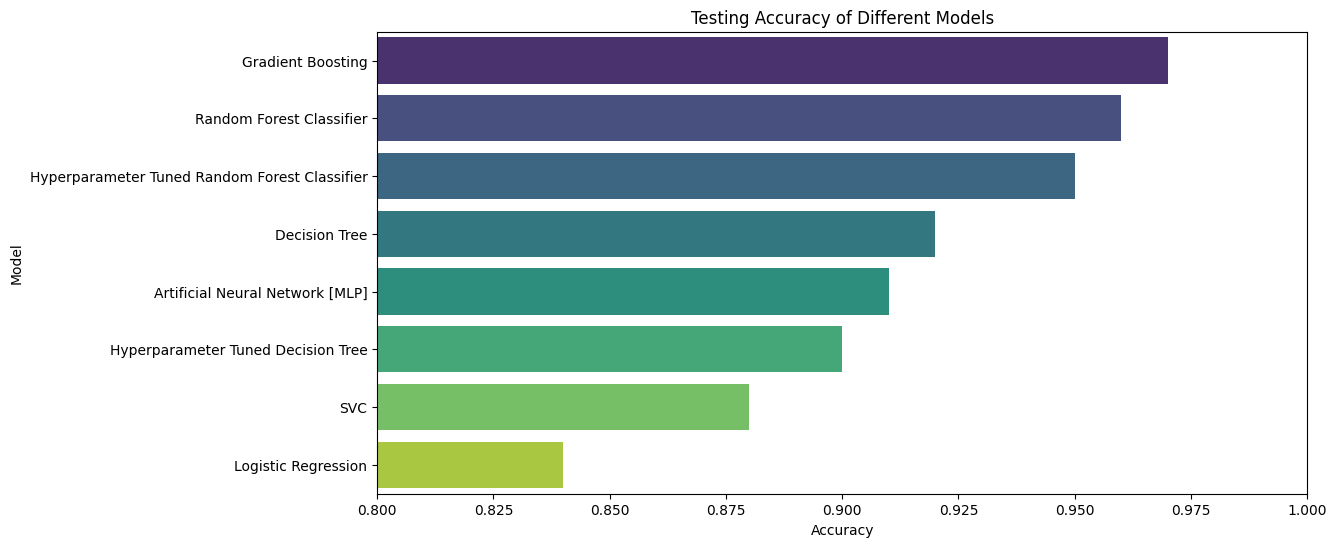

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dictionary with the model names and their testing scores
dataf = {'Model': ['Logistic Regression', 'Decision Tree', 'Hyperparameter Tuned Decision Tree',
                   'Random Forest Classifier', 'Hyperparameter Tuned Random Forest Classifier',
                   'Gradient Boosting', 'SVC', 'Artificial Neural Network [MLP]'],
        'Testing Accuracy': [0.84, 0.92, 0.90, 0.96, 0.95, 0.97, 0.88, 0.91]} # Corrected Testing Accuracy values

# Create a DataFrame
df_scores = pd.DataFrame(dataf)

# Sort the DataFrame by Testing Accuracy
df_scores = df_scores.sort_values('Testing Accuracy', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Testing Accuracy', y='Model', data=df_scores, palette='viridis')
plt.title('Testing Accuracy of Different Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.8, 1.0) # Set x-axis limits for better visualization
plt.show()

### Conclusion:
Based on our analysis of various machine learning models applied to employee performance data, we've observed the following:

* Logistic Regression:
This model served as a useful baseline, demonstrating consistent performance with training and testing accuracies of 0.85 and 0.84, respectively. The close scores indicate good generalization with no overfitting, although its predictive power is limited compared to more advanced models.

* Decision Tree:
The untuned Decision Tree achieved perfect training accuracy (1.00) but dropped to 0.93 on the test set. This clear overfitting suggests the model learned training data patterns too specifically and failed to generalize well to unseen data.

* Hyperparameter Tuned Decision Tree:
With tuning, the model improved generalization, reducing the training score to 0.98 and achieving a testing accuracy of 0.90. Although the overfitting gap was reduced, some signs of overfitting still remain.

* Random Forest Classifier:
This ensemble method achieved 1.00 training accuracy and 0.97 testing accuracy, indicating strong predictive power and better generalization compared to simpler models.

* Hyperparameter Tuned Random Forest Classifier:
The tuned version of the Random Forest achieved 0.98 training and 0.95 testing accuracy. Although slightly lower than the untuned version in raw performance, the smaller gap suggests enhanced robustness and generalization, making it more reliable for unseen data.

* Gradient Boosting:
Also performed strongly with 1.00 training and 0.96 testing accuracy. Like Random Forest, this model generalizes well and captures complex patterns effectively.

* Support Vector Classifier (SVC):
SVC yielded balanced performance with 0.90 training and 0.89 testing accuracy. It didn’t overfit but lagged behind tree-based models in performance.

* Artificial Neural Network (MLP):
Achieved perfect training accuracy (1.00) but showed a drop to 0.91 on the test set, indicating moderate overfitting similar to the untuned Decision Tree.



#### Model Selection: 
After careful comparison, the Hyperparameter Tuned Random Forest Classifier is selected as the best model due to its:

* High training accuracy (0.98) and strong testing performance (0.95).

* Low overfitting risk (narrow accuracy gap).

* Superior generalization to unseen data.

* Interpretability via feature importance and compatibility with real-world deployment.

This model strikes the best balance between performance, robustness, and interpretability, making it a reliable choice for predictive modeling in employee performance analysis.

#### Top 6 important feature for employee performance prediction model to hire.
    - Tuned Random Forest model is the best model.
    - Train R2: 0.98
    - Test R2: 0.95

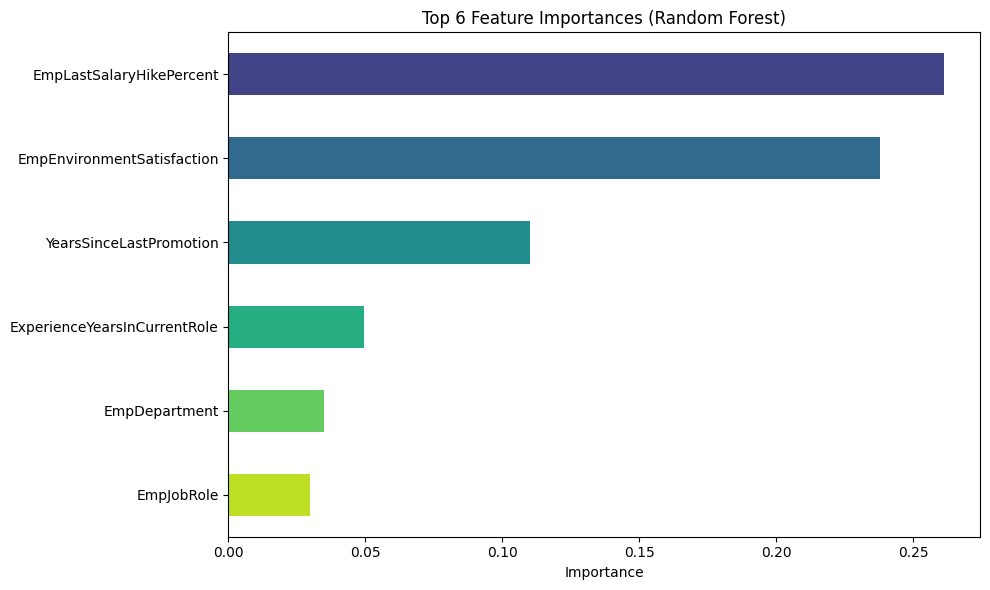

In [172]:
import matplotlib.cm as cm

# Get feature importances from Random Forest model
importances = rfc2.feature_importances_
features = X_train.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Select top 6 features
top_features = feat_importance.head(6)

# Generate viridis colors
viridis_colors = cm.viridis(np.linspace(0.2, 0.9, len(top_features)))

# Plot
plt.figure(figsize=(10, 6))
ax = top_features.plot(kind='barh', color=viridis_colors)
plt.title("Top 6 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()